In [1]:
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_breast_cancer

(a) Use the breast cancer data set from Homework 0 to create a training set.
Recall that the label is 0 if the patient has breast cancer and 1 otherwise.
Compute the base rate of cancer occurrence over the entire data set.

In [2]:
cancer = load_breast_cancer()
#cancer.keys()

cancer_count = len([elem for elem in cancer['target'] if elem != 0])
label_count = len(cancer['target'])
base_rate = cancer_count / label_count

print('The base rate of cancer occurrence over the entire data set:', base_rate)

The base rate of cancer occurrence over the entire data set: 0.6274165202108963


**On random seeds:** Many functions in scikit-learn, including models as well as utilities,
use randomization. For ease of grading, we will fix a random seed (we will use 101 throughout)
so as to make behavior deterministic. This can generally be done by passing in `random_state=101` to
the function; please consult documentation if unsure. Note to peer graders: this is purely for grading
convenience. Do not penalize harshly if the random seed has not been set properly.

(b) The goal is to build a decision tree that, based on the other features in the set,
predicts whether or not a patient has cancer.  So this is a classification problem.
Using tree.DecisionTreeClassifier and other functions in the scikit-learn library, one can
build a decision tree and calculate both its training accuracy when fitted to the entire data set
as well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).

Vary the depth of your decision tree (use max_depth = $1, 2, \dots, 10$) and plot both training
accuracy and cross-validated accuracy (as a function of the depth, on the x-axis). Use 101 as your
random seed. Plot both curves on the same plot and use a legend to label them.

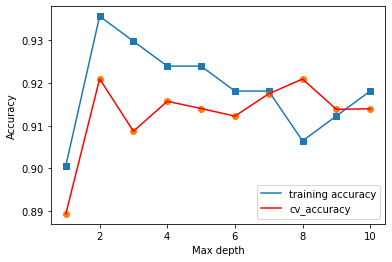

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

#Split dataset in features and target variable
x = cancer['data']
y = cancer['target']

#Split dataset into training set and test set: 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

depth = []
train_accuracy = []
cv_accuracy = []

for dep in range(1, 11):
    clf = tree.DecisionTreeClassifier(max_depth = dep)

    #Train Decision Tree Classifer
    clf = clf.fit(x_train, y_train)

    y_predict = clf.predict(x_test)
    # Model Accuracy
    train_accuracy.append(metrics.accuracy_score(y_test, y_predict))
    #train_accuracy.append(clf.score(x_test, y_test))
    
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator = clf, X = x, y = y, cv = 10, n_jobs=4)
    cv_accuracy.append(scores.mean())
    depth.append(dep)
    
plt.scatter(depth, train_accuracy, marker = 's')
plt.plot(depth, train_accuracy, label = 'training accuracy')
plt.scatter(depth, cv_accuracy, marker = 'o')
plt.plot(depth, cv_accuracy, 'r-', label = 'cv_accuracy')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

(c) Now try the random forest classifier of the scikit-learn library and use the best
depth you get from (b) as max_depth. Vary the number of trees in the forest via the parameter
n_estimators and plot its 10-fold cross-validated accuracy (use n_estimators = $1, 2, \dots, 20$).
Again, use 101 as your random seed. Do you see an improvement using random forests versus
using a single tree? (Note: use the n_estimators=1 result as the result for a single tree.)

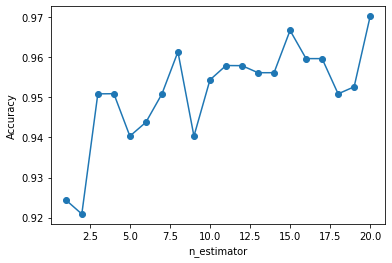

In [43]:
#Split dataset in features and target variable
x = cancer['data']
y = cancer['target']

#Split dataset into training set and test set: 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

est_count = []
cv_accuracy = []

for est in range(1, 21):
    clf = ensemble.RandomForestClassifier(n_estimators = est, max_depth = depth.index(max(depth)))

    #Train Random Forest Classifer
    clf = clf.fit(x_train, y_train)

    y_predict = clf.predict(x_test)
    # Model Accuracy
    accuracy.append(metrics.accuracy_score(y_test, y_predict))
    
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator = clf, X = x, y = y, cv = 10, n_jobs=4)
    cv_accuracy.append(scores.mean())
    est_count.append(est)
    
plt.scatter(est_count, cv_accuracy, marker = 'o')
plt.plot(est_count, cv_accuracy)
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')
plt.show()

(d) Using the method for building a decision tree you used in part (b), build a tree
but randomly hold out a $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you 
will need to build 4 different trees for each depth value). Use 101 as your random seed for both
the train-test split as well as the decision tree.
For each fraction held out, plot a curve of the test accuracy (the accuracy on the held-out
set) against depth. You should have four curves. Plot them all on the same plot and use
a legend to label them.

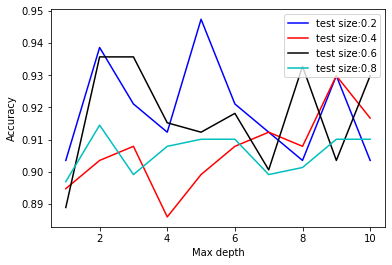

In [61]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

#Split dataset in features and target variable
x = cancer['data']
y = cancer['target']

i = 0
sizes = [0.2, 0.4, 0.6, 0.8]
color = ['b', 'r', 'k', 'c']

for size in sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = size, random_state = 101)
    depth = []
    train_accuracy = []
    cv_accuracy = []

    for dep in range(1, 11):
        clf = tree.DecisionTreeClassifier(max_depth = dep)

        #Train Decision Tree Classifer
        clf = clf.fit(x_train, y_train)

        y_predict = clf.predict(x_test)
        # Model Accuracy
        train_accuracy.append(metrics.accuracy_score(y_test, y_predict))
        #train_accuracy.append(clf.score(x_test, y_test))

        # Perform 10-fold cross validation 
        scores = cross_val_score(estimator = clf, X = x, y = y, cv = 10)
        cv_accuracy.append(scores.mean())
        depth.append(dep)
        label = 'test size:' + str(size)
    
    plt.plot(depth, train_accuracy, color = color[i], label = label)
    i = i + 1
    
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper right')
plt.show()